In [1]:
#LIBRARIES USED

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from imblearn.over_sampling import SMOTE

In [3]:
#UNDERSTANDING OUR DATA

In [4]:
df = pd.read_csv('/Users/maxwell/Downloads/star_classification.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [6]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [7]:
df['class']=[0 if i == 'GALAXY' else 1 if i == 'STAR' else 2 for i in df['class']]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


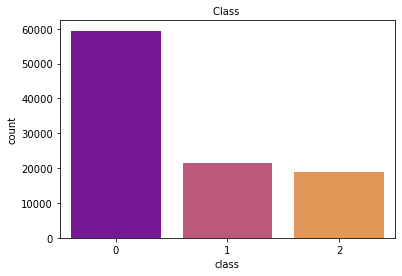

In [8]:
sns.countplot(df['class'], palette='plasma')
plt.title("Class ",fontsize=10)
plt.show()

In [9]:
#OUTLIER DETECTION

In [10]:
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(df) 

In [11]:
x_score = clf.negative_outlier_factor_
#create a repository for the outlier datapoints
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

#threshold
threshold = -1.5                                            
filter = outlier_score["score"] < threshold
outlier_index = outlier_score[filter].index.tolist()
df.drop(outlier_index, inplace=True)

In [12]:
#FEATURE SELECTION

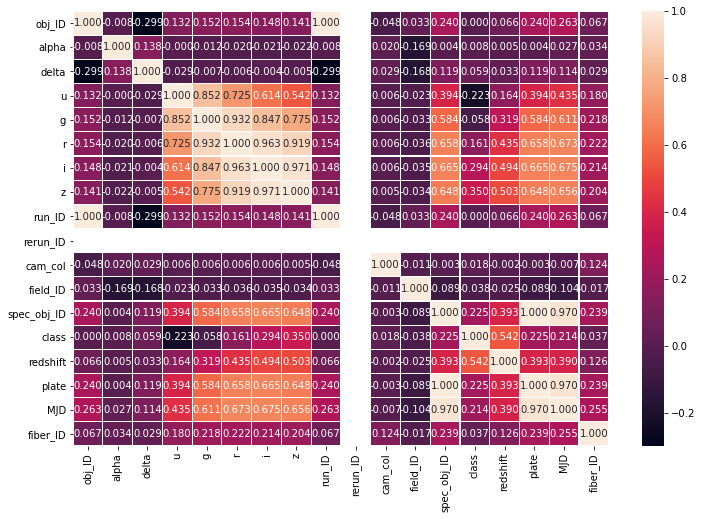

In [13]:
#show correlation of features with target class using heatmap
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, fmt='.3f', ax=ax)
plt.show()

In [14]:
corr = df.corr()
corr['class'].sort_values()

u             -0.222753
g             -0.058143
field_ID      -0.037528
run_ID         0.000244
obj_ID         0.000246
alpha          0.008175
cam_col        0.017759
fiber_ID       0.037326
delta          0.058941
r              0.160688
MJD            0.214442
spec_obj_ID    0.224730
plate          0.224730
i              0.294102
z              0.349734
redshift       0.541676
class          1.000000
rerun_ID            NaN
Name: class, dtype: float64

In [15]:
#remove noise
df.drop(['obj_ID', 'alpha', 'delta', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'fiber_ID'], axis=1)

,u,g,r,i,z,spec_obj_ID,class,redshift,plate,MJD
0,23.87882,22.27530,20.39501,19.16573,18.79371,6.543777e+18,0,0.634794,5812,56354
1,24.77759,22.83188,22.58444,21.16812,21.61427,1.176014e+19,0,0.779136,10445,58158
3,22.13682,23.77656,21.61162,20.50454,19.25010,1.030107e+19,0,0.932346,9149,58039
4,19.43718,17.58028,16.49747,15.97711,15.54461,6.891865e+18,0,0.116123,6121,56187
6,21.46973,21.17624,20.92829,20.60826,20.42573,1.246262e+19,2,0.586455,11069,58456
...,...,...,...,...,...,...,...,...,...,...
99994,20.96526,19.81625,19.34186,19.14711,19.05790,1.154061e+18,0,0.175206,1025,53239
99995,22.16759,22.97586,21.90404,21.30548,20.73569,1.055431e+19,0,0.000000,9374,57749
99996,22.69118,22.38628,20.45003,19.75759,19.41526,8.586351e+18,0,0.404895,7626,56934
99997,21.16916,19.26997,18.20428,17.69034,17.35221,3.112008e+18,0,0.143366,2764,54535


In [16]:
#HANDLING THE INBALANCE IN THE CLASSES

In [17]:
#we will now synthesize new data by duplicating existing elements within the classes to balance them out

In [18]:
X = df.drop(['class'], axis = 1)
y = df.loc[:,'class'].values

In [19]:
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


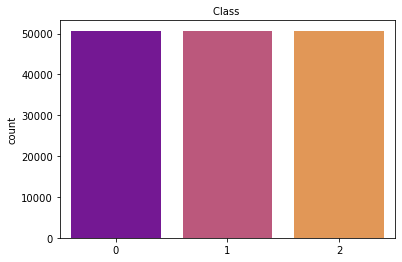

In [20]:
sns.countplot(y, palette='plasma')
plt.title("Class ",fontsize=10)
plt.show()

In [21]:
#DATA SCALING

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [23]:
#MODEL CONSTRUCTION

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
from yellowbrick.classifier import ConfusionMatrix

In [25]:
#Splitting data into training and testing batches

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [27]:
#define model
svm_clf = svm.SVC(random_state=42)
svm_clf.fit(X_train, y_train)
#prediction
preds = svm_clf.predict(X_test)

In [28]:
#EVALUATION

In [29]:
score = svm_clf.score(X_test, y_test)
svm_score = np.mean(score)
print('Accuracy measures to', svm_score)

Accuracy measures to 0.9700444467822108


In [30]:
#create confusion matrix

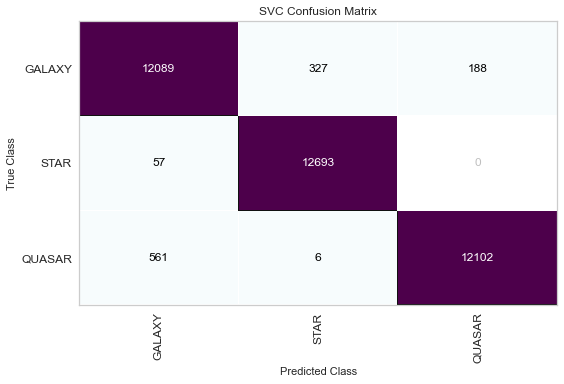

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [34]:
classes = ['GALAXY','STAR','QUASAR']

svm_cm = ConfusionMatrix(svm_clf, classes=classes, cmap="BuPu")

svm_cm.fit(X_train, y_train)
svm_cm.score(X_test, y_test)
svm_cm.show()

In [32]:
#generate classification report

In [33]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     12604
           1       0.97      1.00      0.98     12750
           2       0.98      0.96      0.97     12669

    accuracy                           0.97     38023
   macro avg       0.97      0.97      0.97     38023
weighted avg       0.97      0.97      0.97     38023

